In [1]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

Using TensorFlow backend.


In [0]:
dataFrame = web.DataReader("AAPL", data_source = "yahoo", start = "2012-01-01", end = "2019-12-25")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Closing Price')

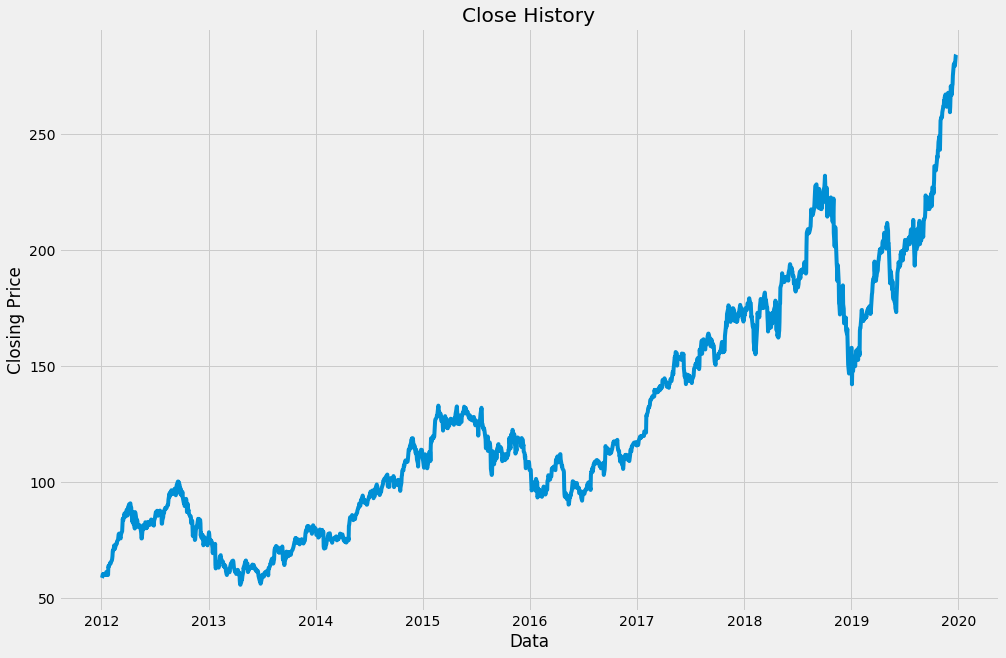

In [3]:
dataFrame.shape

plt.figure(figsize=(15,10))
plt.title("Close History")
plt.plot(dataFrame["Close"])
plt.xlabel("Data")
plt.ylabel("Closing Price")

In [0]:
dataFrameClose = dataFrame.filter(["Close"])
dataFrameCloseNP = dataFrameClose.values
trainDataLength = math.ceil(len(dataFrameCloseNP)*.8)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
dataScaled = scaler.fit_transform(dataFrameCloseNP)

In [0]:
trainingData = dataScaled[0:trainDataLength,:]
xTrain = []
yTrain = []

for i in range (60, len(trainingData)):
  xTrain.append(trainingData[i-60:i,0])
  yTrain.append(trainingData[i,0])
  
  # if i <= 61:
  #   print (xTrain)
  #   print (yTrain)
  #   print()

In [0]:
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

In [8]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))
xTrain.shape

(1547, 60, 1)

In [9]:
LSTmodel = Sequential()
LSTmodel.add(LSTM(50, return_sequences = True, input_shape=(xTrain.shape[1],1 )))
LSTmodel.add(LSTM(50, return_sequences = False))
LSTmodel.add(Dense(25))
LSTmodel.add(Dense(1))


In [10]:
LSTmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
LSTmodel.fit(xTrain,yTrain,batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1547/1547 [==============================] - 130s 84ms/step - loss: 7.1931e-04


In [0]:
testDataSet = dataScaled[trainDataLength - 60: , :]
xTest = []
yTest = dataFrameCloseNP[trainDataLength:,:]

for i in range (60,len(testDataSet)):
  xTest.append(testDataSet[i-60:i,0])

In [0]:
xTest = np.array(xTest)
xTest = np.reshape(xTest,(xTest.shape[0], xTest.shape[1], 1))

In [25]:
predicitonValues = LSTmodel.predict(xTest)
predictionValues = scaler.inverse_transform(predicitonValues)
rmse = np.sqrt(np.mean(predictionValues-yTest)**2)
rmse

0.5950404141014651

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


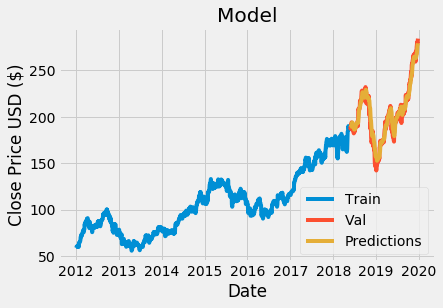

In [26]:
train = dataFrame[:trainDataLength]
valid = dataFrame[trainDataLength:]
valid['Predictions'] = predictionValues
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

